# Introduction to Convolutinal Neural  Networks and Computer Vision with Tensorflow

Computer vision is the practice of writing algoriths which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

# Resources

> 🔑**Note**: Best rresource to play with and understand CNN is CNN Explainer Website
[Here is the link](https://poloclub.github.io/cnn-explainer/)

# Let's Start

## Get the data

The image we're working with are from the Food 101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only two classes (pizza 🍕& steak 🐔) using the image data modifications notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note**: We'vbe started with a smaller dataset so that we can experiment quickly and figure out what works and what not works before scaling up.

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


--2024-05-29 17:37:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.170.207, 173.194.174.207, 74.125.23.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  31.7MB/s    in 4.1s    

2024-05-29 17:37:10 (25.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


## Inspect the data (become one with it)

A very crucial step at the begining of any ML project is becoming one with the data

And for computer vision projects...it means visualizing the samples of the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
import os

# Walkthrough the pizza steak directory and list number of files
for dirpath, dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 May 29 17:37 .
drwxr-xr-x 1 root root 4096 May 29 17:37 ..
drwxr-xr-x 4 root root 4096 May 29 17:37 test
drwxr-xr-x 4 root root 4096 May 29 17:37 train


In [ ]:
# Another way to find out hjow many imaghes are in the file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualise our images, first let's take out class names progrmmatically

In [ ]:
# Get the classnames progrmammatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class names fromthe subdirectories inside train
print(class_names)

['pizza' 'steak']


### Let's visualise our images

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir+target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

['329302.jpg']
Image shape: (512, 382, 3)


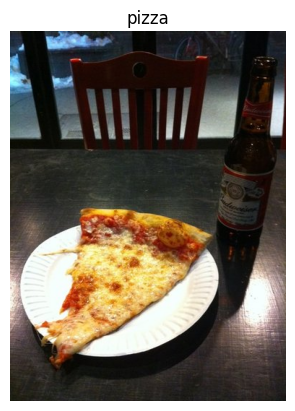

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

array([[[25, 26, 31],
        [29, 30, 35],
        [34, 37, 42],
        ...,
        [30, 31, 33],
        [32, 33, 35],
        [33, 34, 36]],

       [[35, 36, 41],
        [38, 39, 44],
        [41, 44, 49],
        ...,
        [31, 32, 34],
        [33, 34, 36],
        [35, 36, 38]],

       [[36, 39, 46],
        [37, 40, 47],
        [40, 43, 50],
        ...,
        [31, 32, 34],
        [33, 34, 36],
        [35, 36, 38]],

       ...,

       [[30, 32, 19],
        [31, 33, 20],
        [30, 32, 19],
        ...,
        [24, 24, 22],
        [26, 26, 24],
        [27, 27, 25]],

       [[25, 27, 14],
        [29, 31, 18],
        [30, 32, 19],
        ...,
        [21, 23, 20],
        [24, 24, 22],
        [25, 25, 23]],

       [[20, 22,  9],
        [25, 27, 14],
        [27, 29, 16],
        ...,
        [21, 23, 20],
        [23, 23, 21],
        [23, 23, 21]]], dtype=uint8)
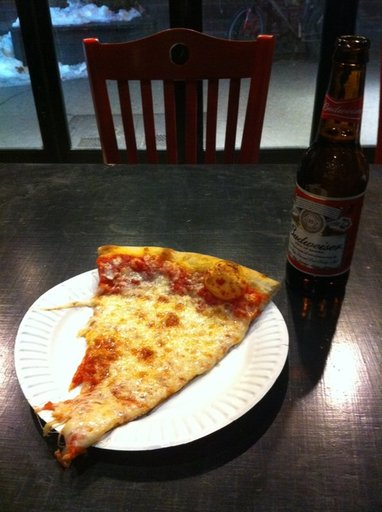

In [ ]:
img

In [ ]:
import tensorflow as tf

In [ ]:
tf.constant(img)

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[25, 26, 31],
        [29, 30, 35],
        [34, 37, 42],
        ...,
        [30, 31, 33],
        [32, 33, 35],
        [33, 34, 36]],

       [[35, 36, 41],
        [38, 39, 44],
        [41, 44, 49],
        ...,
        [31, 32, 34],
        [33, 34, 36],
        [35, 36, 38]],

       [[36, 39, 46],
        [37, 40, 47],
        [40, 43, 50],
        ...,
        [31, 32, 34],
        [33, 34, 36],
        [35, 36, 38]],

       ...,

       [[30, 32, 19],
        [31, 33, 20],
        [30, 32, 19],
        ...,
        [24, 24, 22],
        [26, 26, 24],
        [27, 27, 25]],

       [[25, 27, 14],
        [29, 31, 18],
        [30, 32, 19],
        ...,
        [21, 23, 20],
        [24, 24, 22],
        [25, 25, 23]],

       [[20, 22,  9],
        [25, 27, 14],
        [27, 29, 16],
        ...,
        [21, 23, 20],
        [23, 23, 21],
        [23, 23, 21]]], dtype=uint8)>

In [ ]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 382, 3)

> 🔑**Note**: As we have discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common pre-processing steps for working with images is to **scale**(also referred to as **normalize**) their pixel values by dividing the image arrays by 255.(since 255 is the maximum pixel value)

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.09803922, 0.10196078, 0.12156863],
        [0.11372549, 0.11764706, 0.1372549 ],
        [0.13333333, 0.14509804, 0.16470588],
        ...,
        [0.11764706, 0.12156863, 0.12941176],
        [0.1254902 , 0.12941176, 0.1372549 ],
        [0.12941176, 0.13333333, 0.14117647]],

       [[0.1372549 , 0.14117647, 0.16078431],
        [0.14901961, 0.15294118, 0.17254902],
        [0.16078431, 0.17254902, 0.19215686],
        ...,
        [0.12156863, 0.1254902 , 0.13333333],
        [0.12941176, 0.13333333, 0.14117647],
        [0.1372549 , 0.14117647, 0.14901961]],

       [[0.14117647, 0.15294118, 0.18039216],
        [0.14509804, 0.15686275, 0.18431373],
        [0.15686275, 0.16862745, 0.19607843],
        ...,
        [0.12156863, 0.1254902 , 0.13333333],
        [0.12941176, 0.13333333, 0.14117647],
        [0.1372549 , 0.14117647, 0.14901961]],

       ...,

       [[0.11764706, 0.1254902 , 0.0745098 ],
        [0.12156863, 0.12941176, 0.07843137],
        [0.11764706, 0

## An end to end example
Let's build a CNN to find pattern in images:
- Load our images
- Preprocess the images
- Build a CNN to find pattern in our images
- Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 165ms/step - loss: 0.5901 - accuracy: 0.6680 - val_loss: 0.4143 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 6s 122ms/step - loss: 0.4178 - accuracy: 0.8133 - val_loss: 0.3430 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 6s 127ms/step - loss: 0.3947 - accuracy: 0.8240 - val_loss: 0.3424 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3621 - accuracy: 0.8420 - val_loss: 0.3499 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 6s 119ms/step - loss: 0.3260 - accuracy: 0.8647 - val_loss: 0.3401 - val_accuracy: 0.8480


> 🔑 If it is taking more than ~10 seconds per epoch, try swithcing to a GPU runtime and it will significantly boost the time taken

In [ ]:
len(train_data) # total_images/batch_size = 1500/32 = 46.875 ~ 47

47

In [ ]:
# get model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before

Let's replicate the model we have created in the previous section with our image data.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the Tensorflow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 105ms/step - loss: 0.9605 - accuracy: 0.5120 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 109ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 101ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 121ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 133ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 2X more parameters than the CNN (model_1) , model_2 performs terribly. Let's try and improve it

In [ ]:
# Set seed
tf.random.set_seed(42)

# Create the model( same as above but lets step it up)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 117ms/step - loss: 2.7202 - accuracy: 0.6113 - val_loss: 0.8817 - val_accuracy: 0.6720
Epoch 2/5
47/47 [==============================] - 6s 124ms/step - loss: 0.8371 - accuracy: 0.7047 - val_loss: 0.7971 - val_accuracy: 0.6440
Epoch 3/5
47/47 [==============================] - 5s 102ms/step - loss: 0.7127 - accuracy: 0.7220 - val_loss: 0.4640 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 6s 132ms/step - loss: 0.5078 - accuracy: 0.7673 - val_loss: 0.5994 - val_accuracy: 0.7080
Epoch 5/5
47/47 [==============================] - 5s 108ms/step - loss: 0.5312 - accuracy: 0.7673 - val_loss: 1.1812 - val_accuracy: 0.6180


In [ ]:
# get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 🔑**Note**: You can think of trainable parameters as patterns a model can learn from data. Intuitively, you might think more is better. And in lots cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a high number of, possible learnable parameters, **a convolutional neural network seeks to sort out and learn the most patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different features in an image.

# Binary Classification: Let's Break down
1. Become one with the data (vislaisze, viosualize, visualize)
2. preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches).
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['2691461.jpg']
Image shape: (512, 288, 3)
['2793535.jpg']
Image shape: (512, 512, 3)


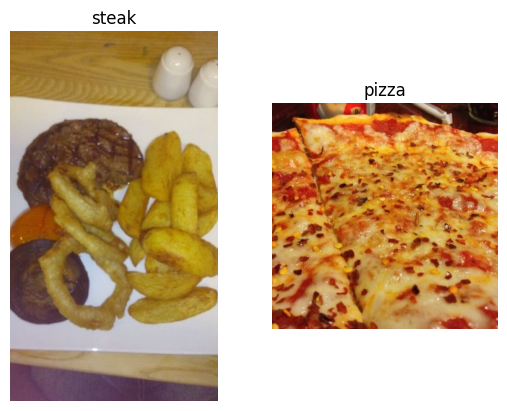

In [ ]:
# Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_image = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_image = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir ="pizza_steak/test/"

Our next step is to turn our data into **batches**.  A batch is a small subset of data.

Instead of looking 10000 images at a time, a model might ony look at 32 at a time.

It does this for couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. trying to learn the patterns in 10,000 images in one hot could result in the model not being able to learn very well.

Why 32?
Because it is good for health

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

test_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# get a sample of a training data batch
images, labels= train_data.next() # get the next batch of images/labels in the train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there
len(train_data)

47

In [ ]:
# get the first 2 images
images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.3137255 , 0.32941177, 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34509805, 0.3803922 ],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.38431376],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.3647059 , 0.40000004, 0.29411766],
          [0.38823533, 0.42352945, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.30980393],
          [0.30980393, 0.29803923, 0.2784314 ],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

In [ ]:
# Make the creating our mdel easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
    Conv2D(filters=10, # filters are the number of sliding windows going across the input image
           kernel_size=3, # it is the size of each filter/sliding window going across the image
           strides=1, # The steps taken by the sliding window. 1 means it goes 1 pixel at a time.
           padding="valid", # if same,output shape is same as input shape, if "valid" output shape is compressed
           activation="relu",
           input_shape=(224,224,3)), # input layer
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer
])

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # This is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 141ms/step - loss: 0.7503 - accuracy: 0.6160 - val_loss: 0.5475 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 5s 110ms/step - loss: 0.4966 - accuracy: 0.7793 - val_loss: 0.4407 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 6s 130ms/step - loss: 0.3881 - accuracy: 0.8393 - val_loss: 0.4184 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 5s 110ms/step - loss: 0.3079 - accuracy: 0.8827 - val_loss: 0.4162 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 6s 137ms/step - loss: 0.1975 - accuracy: 0.9387 - val_loss: 0.3329 - val_accuracy: 0.8740


### 5. Evaluating our model

It looks like our model is learning something so let's evaluate

<Axes: >

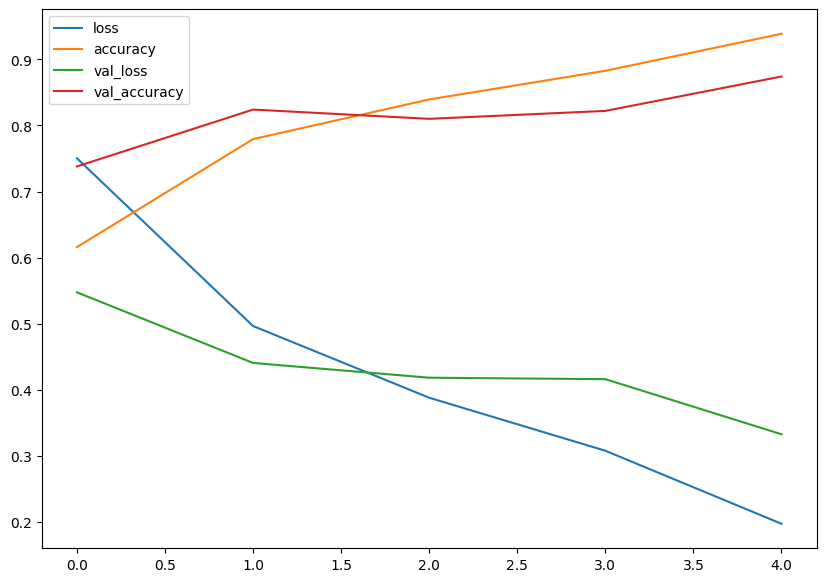

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs it ran

  # Plot the loss
  plt.figure()
  plt.plot(epochs, loss, label ="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label ="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

> 🔑**Note**: When a model's **validation loss starts to increase**, it slikely that the model is **overfitting** the training dataset. This means, its learning the patterns in the training dataset **too well* and thus the model's ability to generlaise unseen data will be dmininished

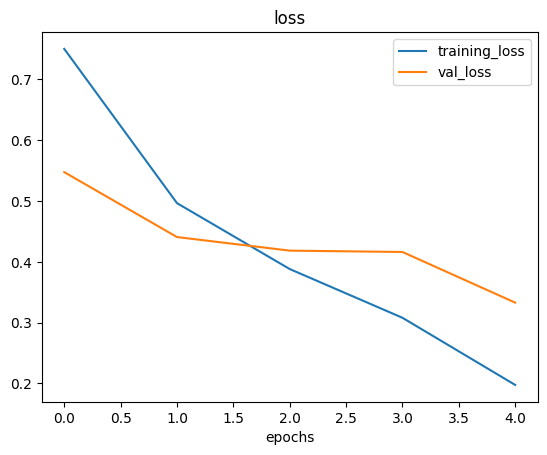

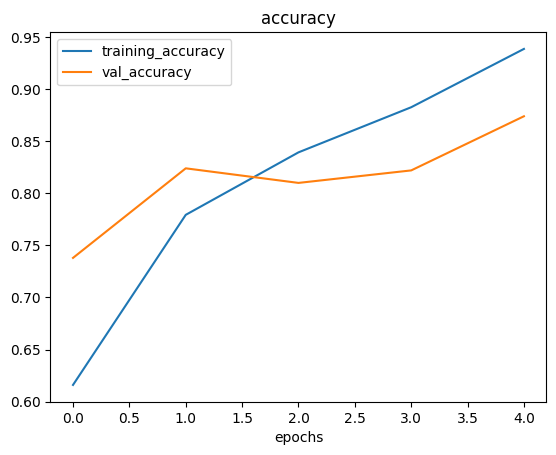

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

> 🔑**Note**: Ideally the two loss curves(training and validation) will be very similar to each other(training loss and validation loss decreasing at similar rates), when there are large differences your model may be overfitting.

### 6. Adjust the model parameters

Fitting a machine learning model come ins 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce Overfitting

Ways to induce overfitting
* Increase the number of conv layers
* Increase the number of conv filters
* add another dense layer to the output of our flattened layer

Reduce overfitting
* Add data augmentation
* Add regularization layers such as MaxPool2D
* Add more data

> 🔑**Note**: Reducing overfitting is also called Regularization.


In [ ]:
# Create the model (this will be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 148ms/step - loss: 0.6371 - accuracy: 0.6427 - val_loss: 0.5015 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 5s 108ms/step - loss: 0.5141 - accuracy: 0.7667 - val_loss: 0.4138 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 6s 118ms/step - loss: 0.4299 - accuracy: 0.8027 - val_loss: 0.3705 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 5s 108ms/step - loss: 0.4270 - accuracy: 0.8160 - val_loss: 0.3490 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 6s 122ms/step - loss: 0.3710 - accuracy: 0.8440 - val_loss: 0.3176 - val_accuracy: 0.8940


In [ ]:
# summary of our model_5
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

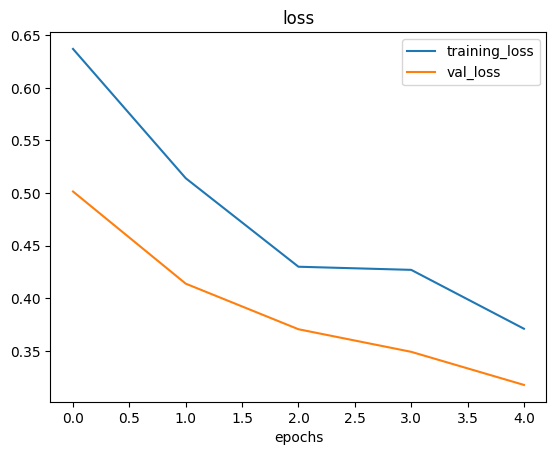

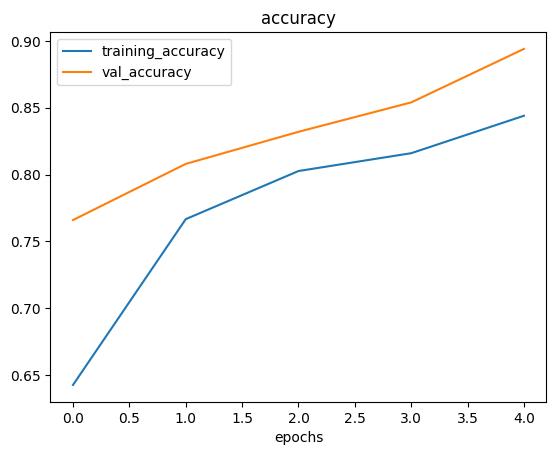

In [ ]:
# Plot the loss curves
plot_loss_curves(history_5)

### Data Augmentation

In [ ]:
## Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerators without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerators without data augmentation for test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> **Question**: What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our model to learn more generalizable patterns. Altering might mean adjusting the rotation of the image, flipping it, cropping it or something similar.

In [ ]:
# Import data and augment it from traning directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                     target_size=(224,224),
                                                                     batch_size =32,
                                                                     class_mode="binary",
                                                                     shuffle=False)
IMG_SIZE = (224,224)
# Create non augmented train data batches
print("Non augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non augmented testing data
print("Non Augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non augmented training data
Found 1500 images belonging to 2 classes.
Non Augmented test data
Found 500 images belonging to 2 classes.


> 🔑**Note**:
* Data augmentation is usually only performed on the training data.
* using `ImageDatagenerator` built in data augmentation parameters our images are left as they are in the directorues but are modified as they are loaded into the model.

In [ ]:
# get sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # labels are not augmented only the images are

Showing image number: 24


(-0.5, 223.5, 223.5, -0.5)

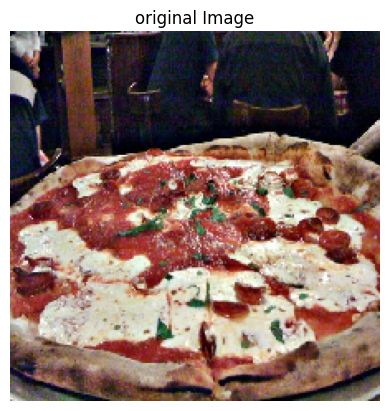

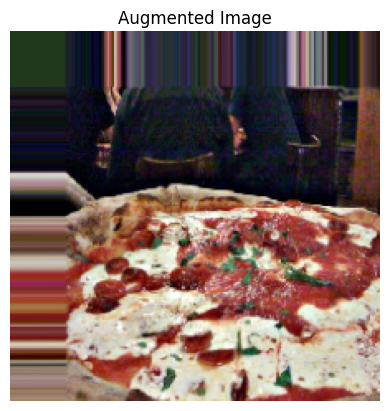

In [ ]:
# Show original image and augmented image
random_number  = random.randint(0,31)
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

Now we will build a model on augmented training data

In [ ]:
# Create a model same as model_5
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 446ms/step - loss: 0.7146 - accuracy: 0.5247 - val_loss: 0.6831 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 20s 424ms/step - loss: 0.6718 - accuracy: 0.6073 - val_loss: 0.7555 - val_accuracy: 0.5040
Epoch 3/5
47/47 [==============================] - 22s 467ms/step - loss: 0.6741 - accuracy: 0.6033 - val_loss: 0.5906 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 21s 451ms/step - loss: 0.6115 - accuracy: 0.6813 - val_loss: 0.5633 - val_accuracy: 0.6700
Epoch 5/5
47/47 [==============================] - 20s 416ms/step - loss: 0.6421 - accuracy: 0.6687 - val_loss: 0.5043 - val_accuracy: 0.8080


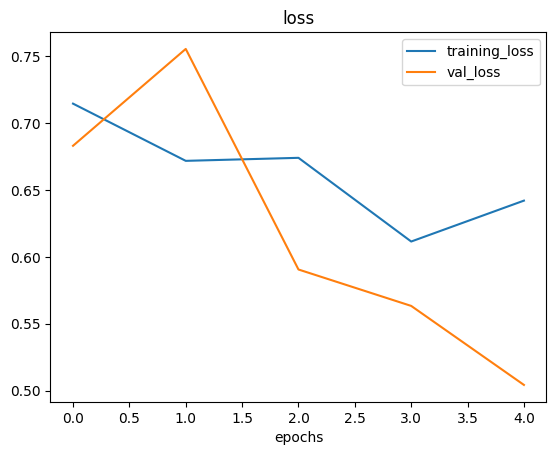

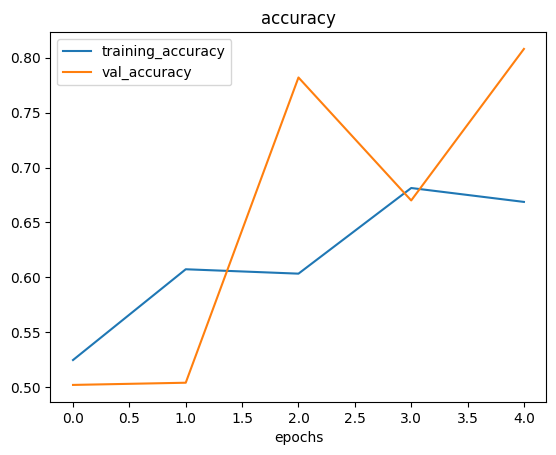

In [ ]:
# Check our models training curves
plot_loss_curves(history_6)

In [ ]:
# Import data and augment it from traning directory
print("Augmented training data")
train_data_augmented_and_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                     target_size=(224,224),
                                                                     batch_size =32,
                                                                     class_mode="binary",
                                                                     shuffle=True)

Augmented training data
Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model same as model_5 and model_6
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented_and_shuffled,
                        epochs=5,
                        steps_per_epoch = len(train_data_augmented_and_shuffled),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 437ms/step - loss: 0.5389 - accuracy: 0.7380 - val_loss: 0.3899 - val_accuracy: 0.8460
Epoch 2/5
47/47 [==============================] - 21s 438ms/step - loss: 0.5062 - accuracy: 0.7573 - val_loss: 0.3982 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 20s 419ms/step - loss: 0.4847 - accuracy: 0.7853 - val_loss: 0.3581 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 21s 443ms/step - loss: 0.4647 - accuracy: 0.7920 - val_loss: 0.3792 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 20s 425ms/step - loss: 0.4619 - accuracy: 0.7927 - val_loss: 0.3468 - val_accuracy: 0.8480


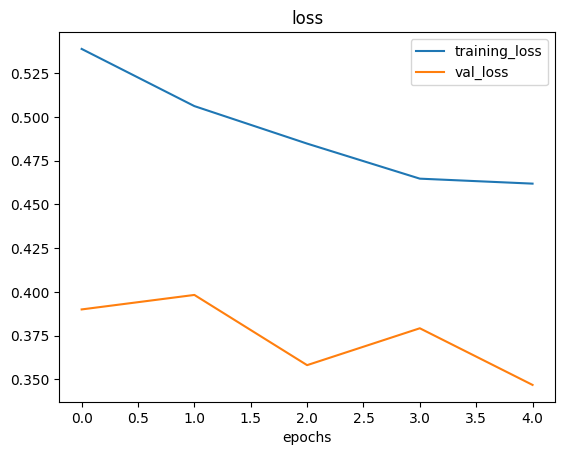

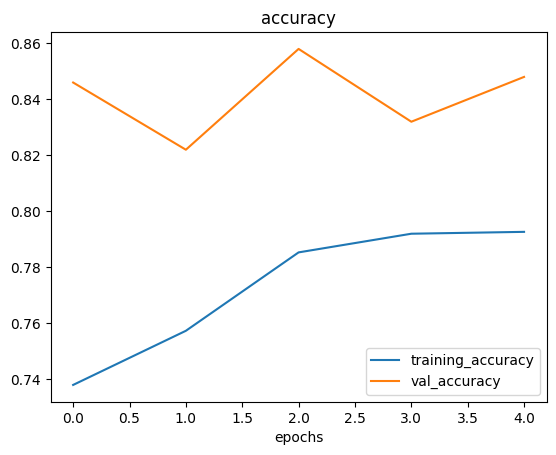

In [ ]:
plot_loss_curves(history_6)

> 🔑**Note**: When shuffling training data, the model gets exposed to all different kinds of data during trainig, thus enabling it to learn fatures across a wide array of images (in our case,pizza & steak at the same time instead of just pizza then steak)

### 7. Repeat until satisfied

Since we've already beatn our baseline, there a few things we can do to improve our model:

* Increase the number of model layers (e.g add more `Conv2D`/ `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g from 10 to 32 to 64)
* Train for longr (more epochs)
* Find an idea learning rate
* get more data (give the model more opportunities to learn)
* Use **Transfer learning** to leverage what another image model has learn and adjust it for our own use case

## making a prediction with our trained model with on our own custom data

In [ ]:
## classes we ar eworking on
print(class_names)

['pizza' 'steak']


In [ ]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg

--2024-05-29 17:44:00--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg           [  <=>               ] 252.06K  1.09MB/s    in 0.2s    

2024-05-29 17:44:01 (1.09 MB/s) - ‘03-steak.jpeg’ saved [258111]



(-0.5, 3023.5, 4031.5, -0.5)

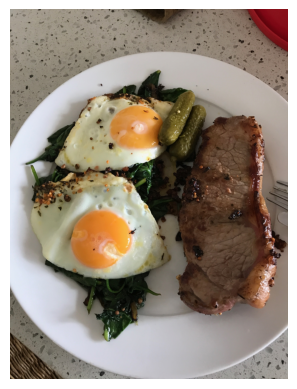

In [ ]:
steak = mpimg.imread("/content/03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape

(4032, 3024, 3)

> 🔑**Note** : When you train a neural network and you want to make a prediction on your custom data i should be preprocessed into the sameformat as the data your model is trained on

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load and preprocess the custom image
steak = load_and_prep_image("/content/03-steak.jpeg")
print(steak)

tf.Tensor(
[[[0.6377451  0.6220588  0.57892156]
  [0.6504902  0.63186276 0.5897059 ]
  [0.63186276 0.60833335 0.5612745 ]
  ...
  [0.52156866 0.05098039 0.09019608]
  [0.49509802 0.04215686 0.07058824]
  [0.52843136 0.07745098 0.10490196]]

 [[0.6617647  0.6460784  0.6107843 ]
  [0.6387255  0.6230392  0.57598037]
  [0.65588236 0.63235295 0.5852941 ]
  ...
  [0.5352941  0.06862745 0.09215686]
  [0.529902   0.05931373 0.09460784]
  [0.5142157  0.05539216 0.08676471]]

 [[0.6519608  0.6362745  0.5892157 ]
  [0.6392157  0.6137255  0.56764704]
  [0.65637255 0.6269608  0.5828431 ]
  ...
  [0.53137255 0.06470589 0.08039216]
  [0.527451   0.06862745 0.1       ]
  [0.52254903 0.05196078 0.0872549 ]]

 ...

 [[0.49313724 0.42745098 0.31029412]
  [0.05441177 0.01911765 0.        ]
  [0.2127451  0.16176471 0.09509804]
  ...
  [0.6132353  0.59362745 0.57009804]
  [0.65294117 0.6333333  0.6098039 ]
  [0.64166665 0.62990195 0.59460783]]

 [[0.65392154 0.5715686  0.45      ]
  [0.6367647  0.54656863 0

In [ ]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)
expanded_steak.shape

TensorShape([1, 224, 224, 3])

In [ ]:
pred = model_6.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 242ms/step


Looks like our custom image is being put through our model, however it currently outpus a prediction probability, wouldn't it be nice if we could visualise the image as well as model's prediction

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability and assigning it to our class name
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots
  the image with predicted class as title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 73ms/step


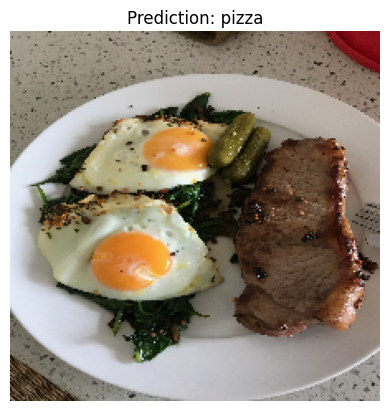

In [ ]:
# test our model on custom image
pred_and_plot(model_7,"/content/03-steak.jpeg")

In [ ]:
# Download another test image
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg

--2024-05-29 17:45:48--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg       [  <=>               ] 252.29K  1.02MB/s    in 0.2s    

2024-05-29 17:45:49 (1.02 MB/s) - ‘03-pizza-dad.jpeg’ saved [258347]



1/1 [==============================] - 0s 17ms/step


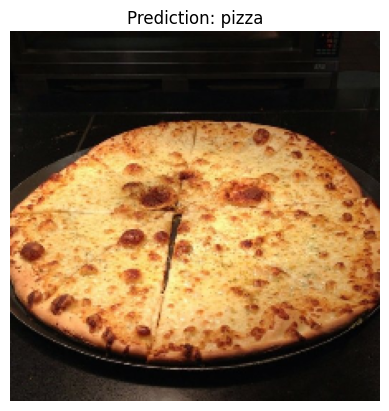

In [ ]:
pred_and_plot(model_7, "/content/pizza_steak/test/pizza/1067986.jpg")

# Multiclass Image Classification

1. Become one with the data
2. preprocess the data
3. Create a model (start with baseline)
4. Fit the model (overfit to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat the baseline/reduce overfitting)
7. Repeat until satisfied

## Import and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-05-29 17:45:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.157.207, 142.251.8.207, 142.251.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.157.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  30.2MB/s    in 18s     

2024-05-29 17:46:08 (27.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walkkthrough 10 classes of food image data
for dirpath, dirname, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirname)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/test'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'
There are 10 directori

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3881738.jpg']
Image shape: (384, 512, 3)


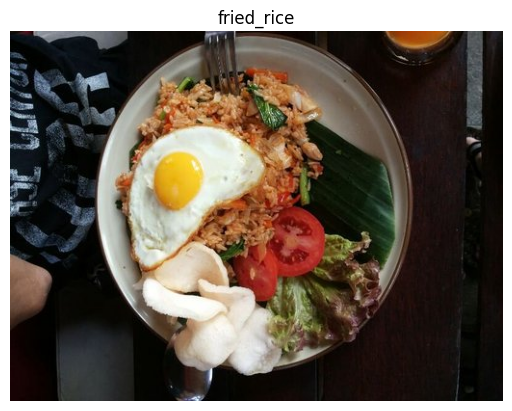

In [ ]:
# Visualize
import random
img = view_random_image(target_dir=train_dir,
                         target_class=random.choice(class_names))

### 2. Preprocess the data prepare it for the model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data from directories
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model

Create the same model same as CNN explainer website

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, MaxPool2D, Conv2D
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
# Creating the tiny vgg model
model_8 = Sequential([
    Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 35s 141ms/step - loss: 2.1590 - accuracy: 0.2009 - val_loss: 2.0944 - val_accuracy: 0.2388
Epoch 2/5
235/235 [==============================] - 29s 122ms/step - loss: 1.9435 - accuracy: 0.3179 - val_loss: 2.0316 - val_accuracy: 0.2964
Epoch 3/5
235/235 [==============================] - 30s 128ms/step - loss: 1.6075 - accuracy: 0.4527 - val_loss: 1.9322 - val_accuracy: 0.3420
Epoch 4/5
235/235 [==============================] - 28s 120ms/step - loss: 0.9496 - accuracy: 0.6875 - val_loss: 2.3433 - val_accuracy: 0.3216
Epoch 5/5
235/235 [==============================] - 27s 115ms/step - loss: 0.3431 - accuracy: 0.8983 - val_loss: 3.4487 - val_accuracy: 0.2908


### 5. Evaluate the model

In [ ]:
# Evaluate on the test_data
model_8.evaluate(test_data)

79/79 [==============================] - 6s 81ms/step - loss: 3.4487 - accuracy: 0.2908


[3.44870662689209, 0.290800005197525]

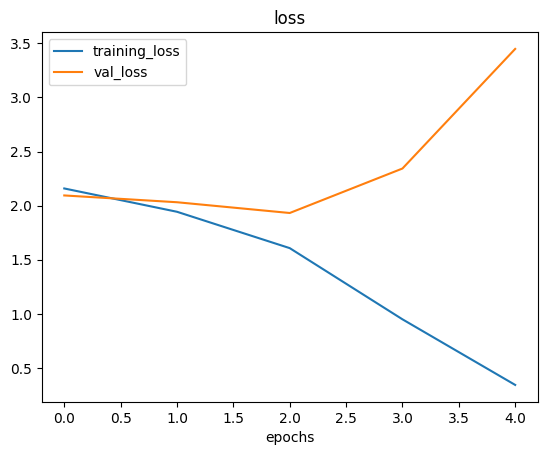

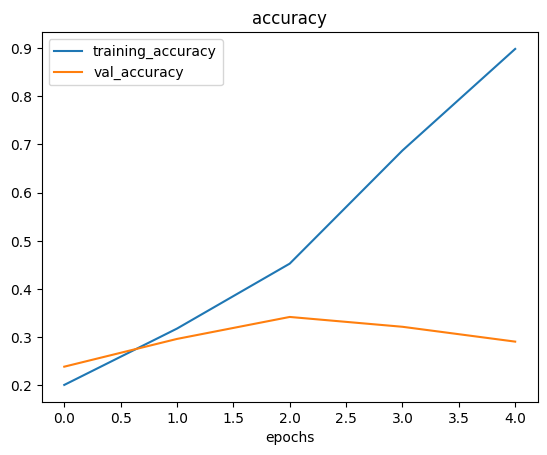

In [ ]:
# Check out the model's loss curve
plot_loss_curves(history_8)

What do these loss curves tell us?

Our model is overfitting the training set quiet badly. It has great results on traininig data but generalises poorly on the unseen data leading to poor generalistion

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data it is clear the model is learning something

However it is not generalizing well to unseen data(overfitting)

So let's try to fix it:

* **Get More Data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is oiverfitting the data ity may be too complicated, one way to simlify the model is to reduce trhe number of layers or reduce the number of hidden units in each layers.
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer Learning** - transfer learning leverages the pattterns another model has learner on similar data to your own and allows you to use those patterns on your own dataset.

In [ ]:
## How about we try and simplify the model first
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

In [ ]:
# Let's try to remove 2 convolutional layers
model_9 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3), activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(loss = "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_13 (Dense)            (None, 10)               

In [ ]:
history_9 = model_9.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data =test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 28s 114ms/step - loss: 2.1281 - accuracy: 0.2372 - val_loss: 1.9774 - val_accuracy: 0.2940
Epoch 2/5
235/235 [==============================] - 28s 120ms/step - loss: 1.8064 - accuracy: 0.3820 - val_loss: 1.9487 - val_accuracy: 0.3012
Epoch 3/5
235/235 [==============================] - 26s 112ms/step - loss: 1.4693 - accuracy: 0.5161 - val_loss: 1.9529 - val_accuracy: 0.3300
Epoch 4/5
235/235 [==============================] - 27s 117ms/step - loss: 1.0022 - accuracy: 0.6813 - val_loss: 2.2990 - val_accuracy: 0.3076
Epoch 5/5
235/235 [==============================] - 26s 112ms/step - loss: 0.5710 - accuracy: 0.8361 - val_loss: 2.6013 - val_accuracy: 0.2912


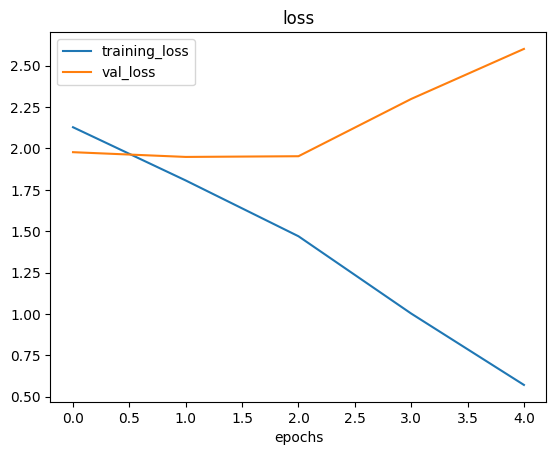

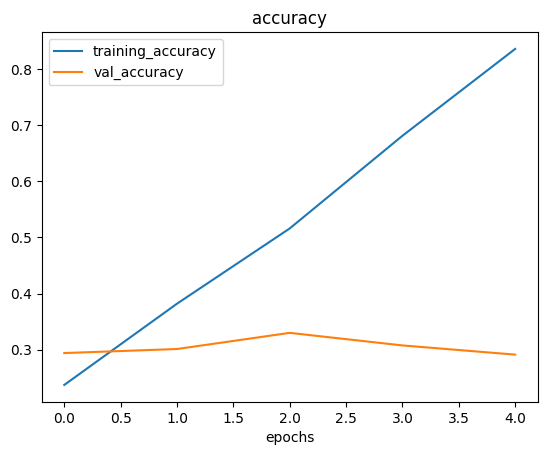

In [ ]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

In [ ]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_13 (Dense)            (None, 10)               

In [ ]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

Looks like our "simplifying the model" experiment didn't work, the accuracy went down and overfitting continued

How about we try data augmentation?

### Trying Reducing Overfitting with Data augmentation

Let's try and improve our model's result using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=0.2)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# let's create another model fitted to augmented train data

model_10 = tf.keras.models.clone_model(model_8) # copies just the architecture of the model inspite of any weights or learnings

# Compile the model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [ ]:
model_10.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

In [ ]:
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 128s 538ms/step - loss: 2.2258 - accuracy: 0.1620 - val_loss: 2.0956 - val_accuracy: 0.2408
Epoch 2/5
235/235 [==============================] - 144s 612ms/step - loss: 2.1027 - accuracy: 0.2472 - val_loss: 1.8922 - val_accuracy: 0.3400
Epoch 3/5
235/235 [==============================] - 123s 524ms/step - loss: 2.0029 - accuracy: 0.3025 - val_loss: 1.8262 - val_accuracy: 0.3600
Epoch 4/5
235/235 [==============================] - 115s 491ms/step - loss: 1.9557 - accuracy: 0.3221 - val_loss: 1.7563 - val_accuracy: 0.3908
Epoch 5/5
235/235 [==============================] - 127s 542ms/step - loss: 1.9061 - accuracy: 0.3447 - val_loss: 1.7871 - val_accuracy: 0.3828


In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 6s 81ms/step - loss: 3.4487 - accuracy: 0.2908


[3.4487054347991943, 0.290800005197525]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 7s 83ms/step - loss: 1.7871 - accuracy: 0.3828


[1.7870705127716064, 0.38280001282691956]

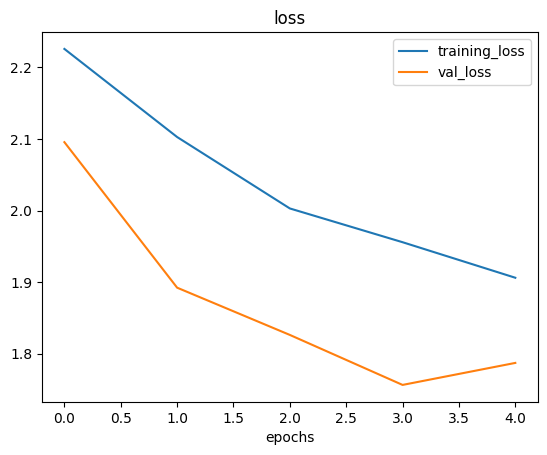

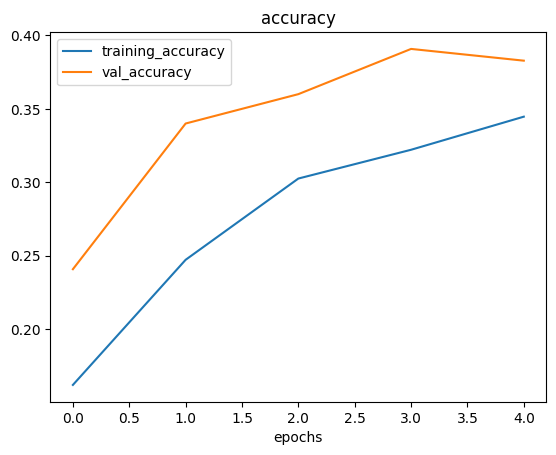

In [ ]:
plot_loss_curves(history_10)

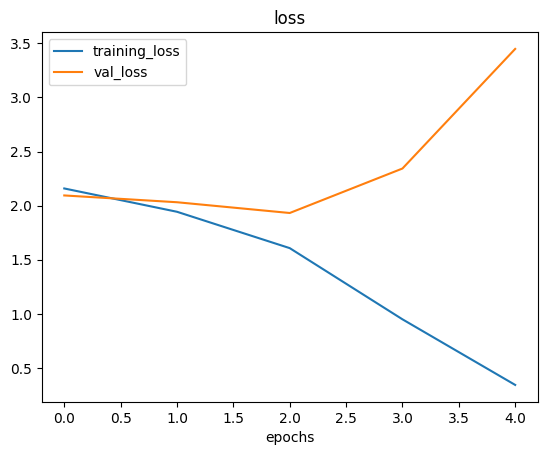

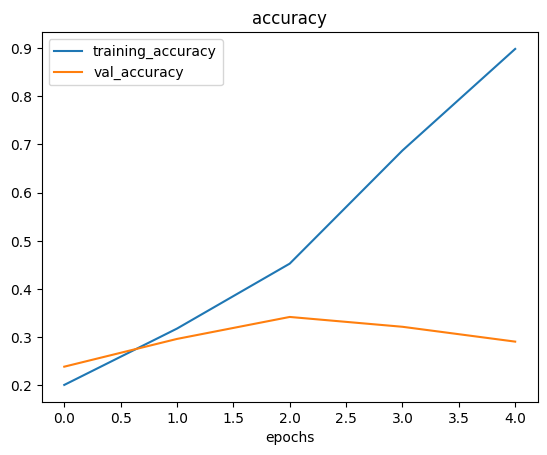

In [ ]:
plot_loss_curves(history_8)

That looks much better!! The loss curves are much close to each other than the baseline model and they look like they are headed in the right direction so if we were to train for longer, we might see further improvements

### 7. Repeat until satisfied

We could keep going here...continually trying to bring the loss curves closer and trying to imprve the validation/test accuracy

How?

By running lots of experiments, namely:
- restructuring our model's architecture(increasing/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- Training for longer(e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

### Making a prediction with our trained model

In [ ]:
# reminder
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg

--2024-05-29 18:09:39--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1     [  <=>               ] 252.30K  1022KB/s    in 0.2s    

2024-05-29 18:09:40 (1022 KB/s) - ‘03-pizza-dad.jpeg.1’ saved [258360]

--2024-05-29 18:09:40--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg       [  <=>               ] 252.28K  1010KB/s    in 0.2s    

2024-05-29 18:09:41 (1010 KB/s) - ‘03-hamburger.jpeg’ saved [258337]



In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots
  the image with predicted class as title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class
  if(len(pred[0])) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    # get the predicted class
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 18ms/step


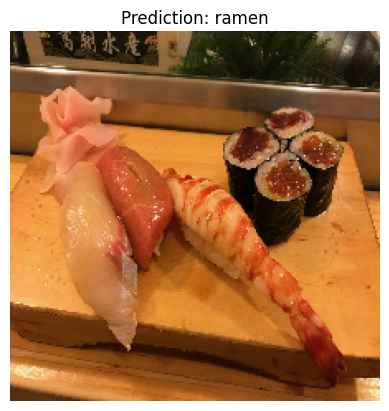

In [ ]:
# Make a prediction using model_10
pred_and_plot(model_10, filename="/content/03-sushi.jpeg", class_names=class_names)

Looks like our model didn't perform really well on our custom images but this because it only achieved ~ 39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

### Saving and Loading our model

In [ ]:
# Save a model
model_10.save("saved_trained_model_10")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 10s 129ms/step - loss: 1.7871 - accuracy: 0.3828


[1.7870705127716064, 0.38280001282691956]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 7s 92ms/step - loss: 1.7871 - accuracy: 0.3828


[1.7870702743530273, 0.38280001282691956]